In [1]:
##Created By Unfriendly 
#(A simple Jupyter Notebook in Binder for Crypto price prediction)

historical_start = "6yr,0mon,0day,0hr,0min,0sec"
# How long to historically look back at data

predict_into = "0yr,0mon,10day,0hr,0min,0sec" 
# How far to try and predict into the future

In [2]:
import os, glob
for dirname, _, filenames in os.walk('/unfriendly/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Prepare data timestamps
import time
from datetime import datetime, timezone, timedelta
one_yr = 31536000000
one_mon = one_yr/12
one_day = one_yr/365
one_hr = one_day/24
one_min = one_hr/60
one_sec = one_min/60

In [6]:
# Prepare how far to look back in the past in UNIX time-format
history_split = historical_start.replace('yr', '')
history_res = history_split.replace('mon', '')
history_split = history_res.replace('day', '')
history_res = history_split.replace('hr', '')
history_split = history_res.replace('min', '')
history_res = history_split.replace('sec', '')
history_split = history_res.split(",")
print(history_split)

['6', '0', '0', '0', '0', '0']


In [7]:
# Prepare how far to predict into the future in UNIX time-format
predict_split = predict_into.replace('yr', '')
predict_res = predict_split.replace('mon', '')
predict_split = predict_res.replace('day', '')
predict_res = predict_split.replace('hr', '')
predict_split = predict_res.replace('min', '')
predict_res = predict_split.replace('sec', '')
predict_split = predict_res.split(",")
print(predict_split)

['0', '0', '10', '0', '0', '0']


In [8]:
history_array_yr = int(history_split[0])
unix_hist_yr = one_yr*history_array_yr

history_array_mon = int(history_split[1])
unix_hist_mon = one_mon*history_array_mon

history_array_day = int(history_split[2])
unix_hist_day = one_day*history_array_day

history_array_hr = int(history_split[3])
unix_hist_hr = one_hr*history_array_hr

history_array_min = int(history_split[4])
unix_hist_min = one_min*history_array_min

history_array_sec = int(history_split[5])
unix_hist_sec = one_sec*history_array_sec

In [9]:
predict_array_yr = int(predict_split[0])
unix_pred_yr = one_yr*predict_array_yr

predict_array_mon = int(predict_split[1])
unix_pred_mon = one_mon*predict_array_mon

predict_array_day = int(predict_split[2])
unix_pred_day = one_day*predict_array_day

predict_array_hr = int(predict_split[3])
unix_pred_hr = one_hr*predict_array_hr

predict_array_min = int(predict_split[4])
unix_pred_min = one_min*predict_array_min

predict_array_sec = int(predict_split[5])
unix_pred_sec = one_sec*predict_array_sec

unix_prediction = unix_pred_yr+unix_pred_mon+unix_pred_day+unix_pred_hr+unix_pred_min+unix_pred_sec

In [10]:
raw_time = time.time()
int_time = int(raw_time)
current_time = str(int_time)

unix_start = unix_hist_yr+unix_hist_mon+unix_hist_day+unix_hist_hr+unix_hist_min+unix_hist_sec
raw_start = raw_time - unix_start

int_start = int(raw_start)
start = str(int_start)

#print(unix_hist_yr+history_array_mon+history_array_day+history_array_hr+history_array_min+history_array_sec)
print(start + ' - start')

gather_count = int_start/(7*one_day)
gather_int = int(gather_count)
gather_str = str(gather_int)
pos_gather_count = abs(int(gather_count))
pos_gather_str = str(pos_gather_count)

print(gather_str + ' - gather')
print(pos_gather_str + ' - positive gather')

-187602613174 - start
-310 - gather
310 - positive gather


In [11]:
print((datetime.now(timezone.utc) + timedelta(hours=0)).timestamp() * 1e3)

dt = (datetime.now(timezone.utc) + timedelta(days=0)).timestamp() * 1e3

c_dt = int(dt)

c_dt_int = int(c_dt)
print(str(c_dt_int))

c_dt_array_year = history_array_yr*365

history_array_comb = history_array_day + c_dt_array_year

c_dt_start = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
print(str(c_dt_start_int))

c_dt_start_raw = (datetime.now(timezone.utc) + timedelta(days=-history_array_comb,hours=-history_array_hr,minutes=-history_array_min,seconds=-history_array_sec)).timestamp()
c_dt_start_raw_int = int(c_dt_start_raw)
print(str(c_dt_start_raw))       
    
data_count = 0

c_dt_start_dt = datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00')

print(datetime.now(timezone.utc))
print(datetime.utcfromtimestamp(c_dt_start_raw).strftime('%Y-%m-%d %H:%M:%S.%f+00:00'))

#c_dt_end = c_dt_start + timedelta(days=7).timestamp() * 1e3
#c_dt_end = (c_dt_start_dt + timedelta(days=7)).timestamp() * 1e3

c_dt_end = (datetime.utcfromtimestamp(c_dt_start_raw) + timedelta(days=7)).timestamp() * 1e3

c_dt_start_int = int(c_dt_start)
c_dt_end_int = int(c_dt_end)
c_dt_end_str = str(c_dt_end)


c_dt_str = str(c_dt)
c_dt_start_str = str(c_dt_start_int)


ts_ten_int = int(c_dt/1000)
start_ten_int = int(c_dt_start_int/1000)

ts_ten_str = str(ts_ten_int)
start_ten_str = str(start_ten_int)


print(c_dt_start_int)
print(c_dt_end_int)
print(c_dt_int)
print('13 Digit Microsecond TS: ' + c_dt_start_str + ' - ' + '10 Digit TS: ' + start_ten_str)

1613386825915.7231
1613386825916
1424170825916
1424170825.916223
2021-02-15 11:00:25.916725+00:00
2015-02-17 11:00:25.916223+00:00
1424170825916
1424793625916
1613386825916
13 Digit Microsecond TS: 1424170825916 - 10 Digit TS: 1424170825


In [12]:
import urllib.request
import yfinance as yf

#while count < pos_gather_count:
while data_count < 1:
    
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=" + current_time + "&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1411862400&period2=1612158064&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+dt_str+"&period2="+dt_end_str+"&interval=1d&events=history&includeAdjustedClose=true"
    #d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+gather_str+"&period2="+current_time+"&interval=1m&events=history&includeAdjustedClose=true"
    
    
    d_u="https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1="+start_ten_str+"&period2="+ts_ten_str+"&interval=1d&events=history&includeAdjustedClose=true"
    
    print(d_u)
    
    with urllib.request.urlopen(d_u) as testfile, open('dataset.csv', 'w') as f:
        f.write(testfile.read().decode())

    data_count += 1  # This is the same as count = count + 1

https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1424170825&period2=1613386825&interval=1d&events=history&includeAdjustedClose=true


In [13]:
#data=pd.read_csv('dataset.csv')
data = yf.download(tickers='BTC-USD', period='max', interval='1d', group_by='column', auto_adjust = True, prepost = True, threads = True, proxy = None)


data.apply(pd.to_numeric, errors='coerce')

#data=data.dropna()
#data=data.dropna(inplace=True)
#data=data.dropna(subset=['Close'])
#data=data.dropna(how='any',axis=1)

data.dropna(subset=['Close'], inplace=True)
data.reset_index(drop=True)

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,81388911810
2021-02-12,47877.035156,48745.734375,46424.976562,47504.851562,76555041196
2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,70250456155


In [14]:
df1=data['Close']
df1

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-02-11    47909.332031
2021-02-12    47504.851562
2021-02-13    47105.515625
2021-02-14    48717.289062
2021-02-15    47801.902344
Name: Close, Length: 2340, dtype: float64

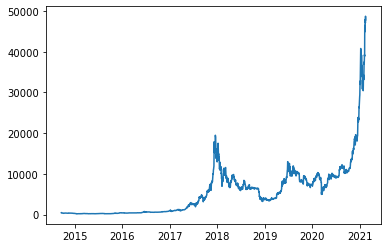

In [15]:
plt.plot(df1)

In [16]:
import numpy as np

In [17]:
df1

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2021-02-11    47909.332031
2021-02-12    47504.851562
2021-02-13    47105.515625
2021-02-14    48717.289062
2021-02-15    47801.902344
Name: Close, Length: 2340, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(1521, 819)

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(1420, 100)
(1420,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(718, 100)
(718,)


(None, None)

In [25]:
X_train.shape[1]

100

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam

In [28]:
#opt = Adam(lr=0.0001)
#opt = Adam(lr=0.0025)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
#model.compile(optimizer=opt, loss='mean_squared_error')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 158ms/step - loss: 0.0066 - val_loss: 0.0017
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 8.8197e-04 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 0s 24ms/step - loss: 4.6031e-04 - val_loss: 0.0019
Epoch 4/100
12/12 [==============================] - 0s 24ms/step - loss: 3.3742e-04 - val_loss: 0.0024
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 2.6488e-04 - val_loss: 0.0022
Epoch 6/100
12/12 [==============================] - 0s 25ms/step - loss: 2.6983e-04 - val_loss: 0.0036
Epoch 7/100
12/12 [==============================] - 0s 25ms/step - loss: 2.8216e-04 - val_loss: 0.0036
Epoch 8/100
12/12 [==============================] - 0s 24ms/step - loss: 2.5503e-04 - val_loss: 0.0021
Epoch 9/100
12/12 [==============================] - 0s 24ms/step - loss: 3.5426e-04 - val_loss: 0.0034
Epoch 10/100
12/12 [==============================] - 0s 25ms/step 

Epoch 79/100
12/12 [==============================] - 0s 25ms/step - loss: 7.8465e-05 - val_loss: 7.5590e-04
Epoch 80/100
12/12 [==============================] - 0s 24ms/step - loss: 1.0911e-04 - val_loss: 8.0021e-04
Epoch 81/100
12/12 [==============================] - 0s 24ms/step - loss: 6.8238e-05 - val_loss: 6.4224e-04
Epoch 82/100
12/12 [==============================] - 0s 24ms/step - loss: 1.3272e-04 - val_loss: 0.0015
Epoch 83/100
12/12 [==============================] - 0s 24ms/step - loss: 1.0827e-04 - val_loss: 0.0010
Epoch 84/100
12/12 [==============================] - 0s 24ms/step - loss: 8.0719e-05 - val_loss: 6.8900e-04
Epoch 85/100
12/12 [==============================] - 0s 24ms/step - loss: 1.0236e-04 - val_loss: 7.5774e-04
Epoch 86/100
12/12 [==============================] - 0s 24ms/step - loss: 9.7955e-05 - val_loss: 9.1898e-04
Epoch 87/100
12/12 [==============================] - 0s 25ms/step - loss: 6.7230e-05 - val_loss: 0.0013
Epoch 88/100
12/12 [===========

In [31]:
import tensorflow as tf
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4923.506610505929

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

12815.515747925821

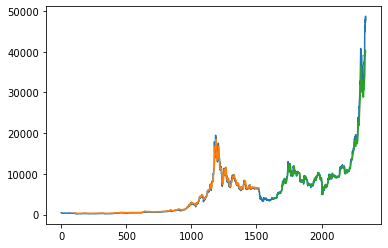

In [34]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)
tdl_int = len(test_data)
tdl_length = tdl_int - 100
print(tdl_int)
print(tdl_length)

819
719


In [36]:
x_input=test_data[tdl_length:].reshape(1,-1)
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.31523941018053636,
 0.31220573852139966,
 0.31135254980328914,
 0.31980834672260033,
 0.3316545261264333,
 0.33250878115439975,
 0.32736510359999665,
 0.32504634240161734,
 0.3407145787101332,
 0.3598598301492006,
 0.36312728521448356,
 0.3633968402984378,
 0.37996540426831726,
 0.38039635440253866,
 0.3747878864652793,
 0.37466672952278246,
 0.38998103143534957,
 0.3822482328364576,
 0.3496663505458229,
 0.3487965233701493,
 0.36134332870648117,
 0.3708216564204548,
 0.40066046666627086,
 0.3837084335293391,
 0.3919099256075411,
 0.3969431093180066,
 0.3815816483431325,
 0.390944492687805,
 0.39487720438885665,
 0.39171501221350113,
 0.37378133019940174,
 0.3785768676453749,
 0.37262448460100156,
 0.3683786801833881,
 0.3837219937716577,
 0.3907004083260695,
 0.3928483989950711,
 0.39635961651722745,
 0.43536977795283643,
 0.4661606620666089,
 0.4730169539639374,
 0.48809489723146093,
 0.48000788256986576,
 0.4661178084818334,
 0.4863065950078193,
 0.47514687772255004,
 0.485336655

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

#Ten Days
#while(i<10):

#One and a half years into the future
while(i<548):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8135878]
101
1 day input [0.31220574 0.31135255 0.31980835 0.33165453 0.33250878 0.3273651
 0.32504634 0.34071458 0.35985983 0.36312729 0.36339684 0.3799654
 0.38039635 0.37478789 0.37466673 0.38998103 0.38224823 0.34966635
 0.34879652 0.36134333 0.37082166 0.40066047 0.38370843 0.39190993
 0.39694311 0.38158165 0.39094449 0.3948772  0.39171501 0.37378133
 0.37857687 0.37262448 0.36837868 0.38372199 0.39070041 0.3928484
 0.39635962 0.43536978 0.46616066 0.47301695 0.4880949  0.48000788
 0.46611781 0.4863066  0.47514688 0.48533666 0.50447257 0.54098423
 0.53759022 0.55432956 0.56004924 0.59050949 0.59382161 0.60149442
 0.65821385 0.67170307 0.65501327 0.69663976 0.754983   0.80744947
 0.83683946 0.82565134 0.78654674 0.72907183 0.69520857 0.76511906
 0.80366459 0.75500368 0.74166958 0.73369945 0.75098027 0.73943765
 0.72868233 0.63139906 0.67631251 0.65698546 0.66155365 0.66314028
 0.66733189 0.62329937 0.6483731  0.70331389 0.70234842 0.67854983
 0.68726065 0.72791056 0.7683274  0.7

11 day output [[0.4498586]]
12 day input [0.3799654  0.38039635 0.37478789 0.37466673 0.38998103 0.38224823
 0.34966635 0.34879652 0.36134333 0.37082166 0.40066047 0.38370843
 0.39190993 0.39694311 0.38158165 0.39094449 0.3948772  0.39171501
 0.37378133 0.37857687 0.37262448 0.36837868 0.38372199 0.39070041
 0.3928484  0.39635962 0.43536978 0.46616066 0.47301695 0.4880949
 0.48000788 0.46611781 0.4863066  0.47514688 0.48533666 0.50447257
 0.54098423 0.53759022 0.55432956 0.56004924 0.59050949 0.59382161
 0.60149442 0.65821385 0.67170307 0.65501327 0.69663976 0.754983
 0.80744947 0.83683946 0.82565134 0.78654674 0.72907183 0.69520857
 0.76511906 0.80366459 0.75500368 0.74166958 0.73369945 0.75098027
 0.73943765 0.72868233 0.63139906 0.67631251 0.65698546 0.66155365
 0.66314028 0.66733189 0.62329937 0.6483731  0.70331389 0.70234842
 0.67854983 0.68726065 0.72791056 0.7683274  0.75707828 0.7821764
 0.80528562 0.79781598 0.9480662  0.95393034 0.92173117 0.98335454
 0.97502147 0.96679439 1.

20 day output [[0.36569646]]
21 day input [0.37082166 0.40066047 0.38370843 0.39190993 0.39694311 0.38158165
 0.39094449 0.3948772  0.39171501 0.37378133 0.37857687 0.37262448
 0.36837868 0.38372199 0.39070041 0.3928484  0.39635962 0.43536978
 0.46616066 0.47301695 0.4880949  0.48000788 0.46611781 0.4863066
 0.47514688 0.48533666 0.50447257 0.54098423 0.53759022 0.55432956
 0.56004924 0.59050949 0.59382161 0.60149442 0.65821385 0.67170307
 0.65501327 0.69663976 0.754983   0.80744947 0.83683946 0.82565134
 0.78654674 0.72907183 0.69520857 0.76511906 0.80366459 0.75500368
 0.74166958 0.73369945 0.75098027 0.73943765 0.72868233 0.63139906
 0.67631251 0.65698546 0.66155365 0.66314028 0.66733189 0.62329937
 0.6483731  0.70331389 0.70234842 0.67854983 0.68726065 0.72791056
 0.7683274  0.75707828 0.7821764  0.80528562 0.79781598 0.9480662
 0.95393034 0.92173117 0.98335454 0.97502147 0.96679439 1.
 0.98114128 0.81358778 0.75047725 0.67085743 0.59632474 0.5350861
 0.49009335 0.46049866 0.444057

31 day output [[0.2010712]]
32 day input [0.37262448 0.36837868 0.38372199 0.39070041 0.3928484  0.39635962
 0.43536978 0.46616066 0.47301695 0.4880949  0.48000788 0.46611781
 0.4863066  0.47514688 0.48533666 0.50447257 0.54098423 0.53759022
 0.55432956 0.56004924 0.59050949 0.59382161 0.60149442 0.65821385
 0.67170307 0.65501327 0.69663976 0.754983   0.80744947 0.83683946
 0.82565134 0.78654674 0.72907183 0.69520857 0.76511906 0.80366459
 0.75500368 0.74166958 0.73369945 0.75098027 0.73943765 0.72868233
 0.63139906 0.67631251 0.65698546 0.66155365 0.66314028 0.66733189
 0.62329937 0.6483731  0.70331389 0.70234842 0.67854983 0.68726065
 0.72791056 0.7683274  0.75707828 0.7821764  0.80528562 0.79781598
 0.9480662  0.95393034 0.92173117 0.98335454 0.97502147 0.96679439
 1.         0.98114128 0.81358778 0.75047725 0.67085743 0.59632474
 0.5350861  0.49009335 0.46049866 0.44405755 0.437525   0.43810725
 0.44304919 0.44985861 0.45670247 0.46124661 0.4622446  0.45835412
 0.4489935  0.4340990

40 day output [[0.16860497]]
41 day input [0.4880949  0.48000788 0.46611781 0.4863066  0.47514688 0.48533666
 0.50447257 0.54098423 0.53759022 0.55432956 0.56004924 0.59050949
 0.59382161 0.60149442 0.65821385 0.67170307 0.65501327 0.69663976
 0.754983   0.80744947 0.83683946 0.82565134 0.78654674 0.72907183
 0.69520857 0.76511906 0.80366459 0.75500368 0.74166958 0.73369945
 0.75098027 0.73943765 0.72868233 0.63139906 0.67631251 0.65698546
 0.66155365 0.66314028 0.66733189 0.62329937 0.6483731  0.70331389
 0.70234842 0.67854983 0.68726065 0.72791056 0.7683274  0.75707828
 0.7821764  0.80528562 0.79781598 0.9480662  0.95393034 0.92173117
 0.98335454 0.97502147 0.96679439 1.         0.98114128 0.81358778
 0.75047725 0.67085743 0.59632474 0.5350861  0.49009335 0.46049866
 0.44405755 0.437525   0.43810725 0.44304919 0.44985861 0.45670247
 0.46124661 0.4622446  0.45835412 0.4489935  0.43409902 0.41449112
 0.39117143 0.36569646 0.33949959 0.31436479 0.29111311 0.27062979
 0.25318116 0.238834

51 day output [[0.13814789]]
52 day input [0.59050949 0.59382161 0.60149442 0.65821385 0.67170307 0.65501327
 0.69663976 0.754983   0.80744947 0.83683946 0.82565134 0.78654674
 0.72907183 0.69520857 0.76511906 0.80366459 0.75500368 0.74166958
 0.73369945 0.75098027 0.73943765 0.72868233 0.63139906 0.67631251
 0.65698546 0.66155365 0.66314028 0.66733189 0.62329937 0.6483731
 0.70331389 0.70234842 0.67854983 0.68726065 0.72791056 0.7683274
 0.75707828 0.7821764  0.80528562 0.79781598 0.9480662  0.95393034
 0.92173117 0.98335454 0.97502147 0.96679439 1.         0.98114128
 0.81358778 0.75047725 0.67085743 0.59632474 0.5350861  0.49009335
 0.46049866 0.44405755 0.437525   0.43810725 0.44304919 0.44985861
 0.45670247 0.46124661 0.4622446  0.45835412 0.4489935  0.43409902
 0.41449112 0.39117143 0.36569646 0.33949959 0.31436479 0.29111311
 0.27062979 0.25318116 0.23883419 0.22735415 0.21833868 0.2112107
 0.20563897 0.2010712  0.1972197  0.19375436 0.1904517  0.18713875
 0.18365896 0.18010074 

59 day output [[0.13402385]]
60 day input [0.80744947 0.83683946 0.82565134 0.78654674 0.72907183 0.69520857
 0.76511906 0.80366459 0.75500368 0.74166958 0.73369945 0.75098027
 0.73943765 0.72868233 0.63139906 0.67631251 0.65698546 0.66155365
 0.66314028 0.66733189 0.62329937 0.6483731  0.70331389 0.70234842
 0.67854983 0.68726065 0.72791056 0.7683274  0.75707828 0.7821764
 0.80528562 0.79781598 0.9480662  0.95393034 0.92173117 0.98335454
 0.97502147 0.96679439 1.         0.98114128 0.81358778 0.75047725
 0.67085743 0.59632474 0.5350861  0.49009335 0.46049866 0.44405755
 0.437525   0.43810725 0.44304919 0.44985861 0.45670247 0.46124661
 0.4622446  0.45835412 0.4489935  0.43409902 0.41449112 0.39117143
 0.36569646 0.33949959 0.31436479 0.29111311 0.27062979 0.25318116
 0.23883419 0.22735415 0.21833868 0.2112107  0.20563897 0.2010712
 0.1972197  0.19375436 0.1904517  0.18713875 0.18365896 0.18010074
 0.17634293 0.17249092 0.16860497 0.16470854 0.16089568 0.15726356
 0.1538188  0.15064505

70 day output [[0.13765007]]
71 day input [0.75098027 0.73943765 0.72868233 0.63139906 0.67631251 0.65698546
 0.66155365 0.66314028 0.66733189 0.62329937 0.6483731  0.70331389
 0.70234842 0.67854983 0.68726065 0.72791056 0.7683274  0.75707828
 0.7821764  0.80528562 0.79781598 0.9480662  0.95393034 0.92173117
 0.98335454 0.97502147 0.96679439 1.         0.98114128 0.81358778
 0.75047725 0.67085743 0.59632474 0.5350861  0.49009335 0.46049866
 0.44405755 0.437525   0.43810725 0.44304919 0.44985861 0.45670247
 0.46124661 0.4622446  0.45835412 0.4489935  0.43409902 0.41449112
 0.39117143 0.36569646 0.33949959 0.31436479 0.29111311 0.27062979
 0.25318116 0.23883419 0.22735415 0.21833868 0.2112107  0.20563897
 0.2010712  0.1972197  0.19375436 0.1904517  0.18713875 0.18365896
 0.18010074 0.17634293 0.17249092 0.16860497 0.16470854 0.16089568
 0.15726356 0.1538188  0.15064505 0.14777668 0.14522965 0.14302732
 0.14111565 0.13950787 0.13814789 0.13703351 0.13614149 0.13545415
 0.13492419 0.134529

80 day output [[0.1460906]]
81 day input [0.6483731  0.70331389 0.70234842 0.67854983 0.68726065 0.72791056
 0.7683274  0.75707828 0.7821764  0.80528562 0.79781598 0.9480662
 0.95393034 0.92173117 0.98335454 0.97502147 0.96679439 1.
 0.98114128 0.81358778 0.75047725 0.67085743 0.59632474 0.5350861
 0.49009335 0.46049866 0.44405755 0.437525   0.43810725 0.44304919
 0.44985861 0.45670247 0.46124661 0.4622446  0.45835412 0.4489935
 0.43409902 0.41449112 0.39117143 0.36569646 0.33949959 0.31436479
 0.29111311 0.27062979 0.25318116 0.23883419 0.22735415 0.21833868
 0.2112107  0.20563897 0.2010712  0.1972197  0.19375436 0.1904517
 0.18713875 0.18365896 0.18010074 0.17634293 0.17249092 0.16860497
 0.16470854 0.16089568 0.15726356 0.1538188  0.15064505 0.14777668
 0.14522965 0.14302732 0.14111565 0.13950787 0.13814789 0.13703351
 0.13614149 0.13545415 0.13492419 0.13452974 0.13427027 0.13410182
 0.13402385 0.13404515 0.1341296  0.1342708  0.13448733 0.1348006
 0.13513084 0.13552353 0.13598202 

91 day output [[0.15766945]]
92 day input [0.9480662  0.95393034 0.92173117 0.98335454 0.97502147 0.96679439
 1.         0.98114128 0.81358778 0.75047725 0.67085743 0.59632474
 0.5350861  0.49009335 0.46049866 0.44405755 0.437525   0.43810725
 0.44304919 0.44985861 0.45670247 0.46124661 0.4622446  0.45835412
 0.4489935  0.43409902 0.41449112 0.39117143 0.36569646 0.33949959
 0.31436479 0.29111311 0.27062979 0.25318116 0.23883419 0.22735415
 0.21833868 0.2112107  0.20563897 0.2010712  0.1972197  0.19375436
 0.1904517  0.18713875 0.18365896 0.18010074 0.17634293 0.17249092
 0.16860497 0.16470854 0.16089568 0.15726356 0.1538188  0.15064505
 0.14777668 0.14522965 0.14302732 0.14111565 0.13950787 0.13814789
 0.13703351 0.13614149 0.13545415 0.13492419 0.13452974 0.13427027
 0.13410182 0.13402385 0.13404515 0.1341296  0.1342708  0.13448733
 0.1348006  0.13513084 0.13552353 0.13598202 0.13646719 0.13703415
 0.13765007 0.13832453 0.13903983 0.13979402 0.1406038  0.1414295
 0.14231509 0.1432134

105 day output [[0.17242329]]
106 day input [0.46049866 0.44405755 0.437525   0.43810725 0.44304919 0.44985861
 0.45670247 0.46124661 0.4622446  0.45835412 0.4489935  0.43409902
 0.41449112 0.39117143 0.36569646 0.33949959 0.31436479 0.29111311
 0.27062979 0.25318116 0.23883419 0.22735415 0.21833868 0.2112107
 0.20563897 0.2010712  0.1972197  0.19375436 0.1904517  0.18713875
 0.18365896 0.18010074 0.17634293 0.17249092 0.16860497 0.16470854
 0.16089568 0.15726356 0.1538188  0.15064505 0.14777668 0.14522965
 0.14302732 0.14111565 0.13950787 0.13814789 0.13703351 0.13614149
 0.13545415 0.13492419 0.13452974 0.13427027 0.13410182 0.13402385
 0.13404515 0.1341296  0.1342708  0.13448733 0.1348006  0.13513084
 0.13552353 0.13598202 0.13646719 0.13703415 0.13765007 0.13832453
 0.13903983 0.13979402 0.1406038  0.1414295  0.14231509 0.14321342
 0.14413734 0.14509155 0.1460906  0.14711048 0.14812864 0.14914912
 0.1501807  0.1512247  0.152289   0.1533601  0.15443619 0.15550803
 0.15658304 0.15766

119 day output [[0.1845155]]
120 day input [0.36569646 0.33949959 0.31436479 0.29111311 0.27062979 0.25318116
 0.23883419 0.22735415 0.21833868 0.2112107  0.20563897 0.2010712
 0.1972197  0.19375436 0.1904517  0.18713875 0.18365896 0.18010074
 0.17634293 0.17249092 0.16860497 0.16470854 0.16089568 0.15726356
 0.1538188  0.15064505 0.14777668 0.14522965 0.14302732 0.14111565
 0.13950787 0.13814789 0.13703351 0.13614149 0.13545415 0.13492419
 0.13452974 0.13427027 0.13410182 0.13402385 0.13404515 0.1341296
 0.1342708  0.13448733 0.1348006  0.13513084 0.13552353 0.13598202
 0.13646719 0.13703415 0.13765007 0.13832453 0.13903983 0.13979402
 0.1406038  0.1414295  0.14231509 0.14321342 0.14413734 0.14509155
 0.1460906  0.14711048 0.14812864 0.14914912 0.1501807  0.1512247
 0.152289   0.1533601  0.15443619 0.15550803 0.15658304 0.15766945
 0.15876245 0.15987405 0.16097505 0.16205373 0.16313587 0.16421139
 0.16527627 0.16632862 0.16738878 0.16839644 0.16942322 0.17045704
 0.17143802 0.17242329

130 day input [0.20563897 0.2010712  0.1972197  0.19375436 0.1904517  0.18713875
 0.18365896 0.18010074 0.17634293 0.17249092 0.16860497 0.16470854
 0.16089568 0.15726356 0.1538188  0.15064505 0.14777668 0.14522965
 0.14302732 0.14111565 0.13950787 0.13814789 0.13703351 0.13614149
 0.13545415 0.13492419 0.13452974 0.13427027 0.13410182 0.13402385
 0.13404515 0.1341296  0.1342708  0.13448733 0.1348006  0.13513084
 0.13552353 0.13598202 0.13646719 0.13703415 0.13765007 0.13832453
 0.13903983 0.13979402 0.1406038  0.1414295  0.14231509 0.14321342
 0.14413734 0.14509155 0.1460906  0.14711048 0.14812864 0.14914912
 0.1501807  0.1512247  0.152289   0.1533601  0.15443619 0.15550803
 0.15658304 0.15766945 0.15876245 0.15987405 0.16097505 0.16205373
 0.16313587 0.16421139 0.16527627 0.16632862 0.16738878 0.16839644
 0.16942322 0.17045704 0.17143802 0.17242329 0.17337416 0.17431727
 0.17524725 0.17619731 0.17710315 0.1780097  0.1788545  0.17971759
 0.18054716 0.18137868 0.18218005 0.18296757 0.1

143 day output [[0.19736344]]
144 day input [0.1538188  0.15064505 0.14777668 0.14522965 0.14302732 0.14111565
 0.13950787 0.13814789 0.13703351 0.13614149 0.13545415 0.13492419
 0.13452974 0.13427027 0.13410182 0.13402385 0.13404515 0.1341296
 0.1342708  0.13448733 0.1348006  0.13513084 0.13552353 0.13598202
 0.13646719 0.13703415 0.13765007 0.13832453 0.13903983 0.13979402
 0.1406038  0.1414295  0.14231509 0.14321342 0.14413734 0.14509155
 0.1460906  0.14711048 0.14812864 0.14914912 0.1501807  0.1512247
 0.152289   0.1533601  0.15443619 0.15550803 0.15658304 0.15766945
 0.15876245 0.15987405 0.16097505 0.16205373 0.16313587 0.16421139
 0.16527627 0.16632862 0.16738878 0.16839644 0.16942322 0.17045704
 0.17143802 0.17242329 0.17337416 0.17431727 0.17524725 0.17619731
 0.17710315 0.1780097  0.1788545  0.17971759 0.18054716 0.18137868
 0.18218005 0.18296757 0.18375091 0.18451551 0.18524681 0.18598796
 0.18669681 0.18740049 0.18804571 0.1886747  0.18931384 0.18991105
 0.19052087 0.191118

157 day output [[0.20085792]]
158 day input [0.13410182 0.13402385 0.13404515 0.1341296  0.1342708  0.13448733
 0.1348006  0.13513084 0.13552353 0.13598202 0.13646719 0.13703415
 0.13765007 0.13832453 0.13903983 0.13979402 0.1406038  0.1414295
 0.14231509 0.14321342 0.14413734 0.14509155 0.1460906  0.14711048
 0.14812864 0.14914912 0.1501807  0.1512247  0.152289   0.1533601
 0.15443619 0.15550803 0.15658304 0.15766945 0.15876245 0.15987405
 0.16097505 0.16205373 0.16313587 0.16421139 0.16527627 0.16632862
 0.16738878 0.16839644 0.16942322 0.17045704 0.17143802 0.17242329
 0.17337416 0.17431727 0.17524725 0.17619731 0.17710315 0.1780097
 0.1788545  0.17971759 0.18054716 0.18137868 0.18218005 0.18296757
 0.18375091 0.18451551 0.18524681 0.18598796 0.18669681 0.18740049
 0.18804571 0.1886747  0.18931384 0.18991105 0.19052087 0.19111845
 0.19169541 0.19222586 0.19276723 0.19326323 0.1937445  0.19422524
 0.1946709  0.19509976 0.1955146  0.19593297 0.19631372 0.19667102
 0.19701892 0.1973634

171 day output [[0.20226392]]
172 day input [0.13903983 0.13979402 0.1406038  0.1414295  0.14231509 0.14321342
 0.14413734 0.14509155 0.1460906  0.14711048 0.14812864 0.14914912
 0.1501807  0.1512247  0.152289   0.1533601  0.15443619 0.15550803
 0.15658304 0.15766945 0.15876245 0.15987405 0.16097505 0.16205373
 0.16313587 0.16421139 0.16527627 0.16632862 0.16738878 0.16839644
 0.16942322 0.17045704 0.17143802 0.17242329 0.17337416 0.17431727
 0.17524725 0.17619731 0.17710315 0.1780097  0.1788545  0.17971759
 0.18054716 0.18137868 0.18218005 0.18296757 0.18375091 0.18451551
 0.18524681 0.18598796 0.18669681 0.18740049 0.18804571 0.1886747
 0.18931384 0.18991105 0.19052087 0.19111845 0.19169541 0.19222586
 0.19276723 0.19326323 0.1937445  0.19422524 0.1946709  0.19509976
 0.1955146  0.19593297 0.19631372 0.19667102 0.19701892 0.19736344
 0.19770136 0.19804108 0.19833125 0.19862211 0.19891219 0.19916971
 0.19942598 0.19965084 0.19990908 0.20012262 0.20033182 0.20050381
 0.20069699 0.20085

184 day output [[0.20252122]]
185 day input [0.1512247  0.152289   0.1533601  0.15443619 0.15550803 0.15658304
 0.15766945 0.15876245 0.15987405 0.16097505 0.16205373 0.16313587
 0.16421139 0.16527627 0.16632862 0.16738878 0.16839644 0.16942322
 0.17045704 0.17143802 0.17242329 0.17337416 0.17431727 0.17524725
 0.17619731 0.17710315 0.1780097  0.1788545  0.17971759 0.18054716
 0.18137868 0.18218005 0.18296757 0.18375091 0.18451551 0.18524681
 0.18598796 0.18669681 0.18740049 0.18804571 0.1886747  0.18931384
 0.18991105 0.19052087 0.19111845 0.19169541 0.19222586 0.19276723
 0.19326323 0.1937445  0.19422524 0.1946709  0.19509976 0.1955146
 0.19593297 0.19631372 0.19667102 0.19701892 0.19736344 0.19770136
 0.19804108 0.19833125 0.19862211 0.19891219 0.19916971 0.19942598
 0.19965084 0.19990908 0.20012262 0.20033182 0.20050381 0.20069699
 0.20085792 0.20099823 0.20115127 0.20128746 0.20141026 0.20152305
 0.20164461 0.20176071 0.20182674 0.20192088 0.20198062 0.20207743
 0.20212252 0.20219

197 day output [[0.20245895]]
198 day input [0.16527627 0.16632862 0.16738878 0.16839644 0.16942322 0.17045704
 0.17143802 0.17242329 0.17337416 0.17431727 0.17524725 0.17619731
 0.17710315 0.1780097  0.1788545  0.17971759 0.18054716 0.18137868
 0.18218005 0.18296757 0.18375091 0.18451551 0.18524681 0.18598796
 0.18669681 0.18740049 0.18804571 0.1886747  0.18931384 0.18991105
 0.19052087 0.19111845 0.19169541 0.19222586 0.19276723 0.19326323
 0.1937445  0.19422524 0.1946709  0.19509976 0.1955146  0.19593297
 0.19631372 0.19667102 0.19701892 0.19736344 0.19770136 0.19804108
 0.19833125 0.19862211 0.19891219 0.19916971 0.19942598 0.19965084
 0.19990908 0.20012262 0.20033182 0.20050381 0.20069699 0.20085792
 0.20099823 0.20115127 0.20128746 0.20141026 0.20152305 0.20164461
 0.20176071 0.20182674 0.20192088 0.20198062 0.20207743 0.20212252
 0.20219286 0.20226392 0.20230995 0.20235571 0.20239332 0.20242871
 0.20246705 0.20247574 0.20253035 0.20252825 0.20253706 0.20256121
 0.20253906 0.2025

210 day output [[0.20214862]]
211 day input [0.1780097  0.1788545  0.17971759 0.18054716 0.18137868 0.18218005
 0.18296757 0.18375091 0.18451551 0.18524681 0.18598796 0.18669681
 0.18740049 0.18804571 0.1886747  0.18931384 0.18991105 0.19052087
 0.19111845 0.19169541 0.19222586 0.19276723 0.19326323 0.1937445
 0.19422524 0.1946709  0.19509976 0.1955146  0.19593297 0.19631372
 0.19667102 0.19701892 0.19736344 0.19770136 0.19804108 0.19833125
 0.19862211 0.19891219 0.19916971 0.19942598 0.19965084 0.19990908
 0.20012262 0.20033182 0.20050381 0.20069699 0.20085792 0.20099823
 0.20115127 0.20128746 0.20141026 0.20152305 0.20164461 0.20176071
 0.20182674 0.20192088 0.20198062 0.20207743 0.20212252 0.20219286
 0.20226392 0.20230995 0.20235571 0.20239332 0.20242871 0.20246705
 0.20247574 0.20253035 0.20252825 0.20253706 0.20256121 0.20253906
 0.20252918 0.20252122 0.2024987  0.20248573 0.20247513 0.2024658
 0.2024646  0.2024627  0.2024831  0.20249663 0.20247705 0.20247415
 0.20246942 0.202466

224 day output [[0.20189579]]
225 day input [0.1886747  0.18931384 0.18991105 0.19052087 0.19111845 0.19169541
 0.19222586 0.19276723 0.19326323 0.1937445  0.19422524 0.1946709
 0.19509976 0.1955146  0.19593297 0.19631372 0.19667102 0.19701892
 0.19736344 0.19770136 0.19804108 0.19833125 0.19862211 0.19891219
 0.19916971 0.19942598 0.19965084 0.19990908 0.20012262 0.20033182
 0.20050381 0.20069699 0.20085792 0.20099823 0.20115127 0.20128746
 0.20141026 0.20152305 0.20164461 0.20176071 0.20182674 0.20192088
 0.20198062 0.20207743 0.20212252 0.20219286 0.20226392 0.20230995
 0.20235571 0.20239332 0.20242871 0.20246705 0.20247574 0.20253035
 0.20252825 0.20253706 0.20256121 0.20253906 0.20252918 0.20252122
 0.2024987  0.20248573 0.20247513 0.2024658  0.2024646  0.2024627
 0.2024831  0.20249663 0.20247705 0.20247415 0.20246942 0.20246603
 0.20245895 0.20245942 0.20245816 0.20245197 0.20242853 0.20239429
 0.20236315 0.20232922 0.20231026 0.20225491 0.20222616 0.20219813
 0.20217127 0.202148

238 day output [[0.20175217]]
239 day input [0.19593297 0.19631372 0.19667102 0.19701892 0.19736344 0.19770136
 0.19804108 0.19833125 0.19862211 0.19891219 0.19916971 0.19942598
 0.19965084 0.19990908 0.20012262 0.20033182 0.20050381 0.20069699
 0.20085792 0.20099823 0.20115127 0.20128746 0.20141026 0.20152305
 0.20164461 0.20176071 0.20182674 0.20192088 0.20198062 0.20207743
 0.20212252 0.20219286 0.20226392 0.20230995 0.20235571 0.20239332
 0.20242871 0.20246705 0.20247574 0.20253035 0.20252825 0.20253706
 0.20256121 0.20253906 0.20252918 0.20252122 0.2024987  0.20248573
 0.20247513 0.2024658  0.2024646  0.2024627  0.2024831  0.20249663
 0.20247705 0.20247415 0.20246942 0.20246603 0.20245895 0.20245942
 0.20245816 0.20245197 0.20242853 0.20239429 0.20236315 0.20232922
 0.20231026 0.20225491 0.20222616 0.20219813 0.20217127 0.20214862
 0.20212629 0.20208561 0.20205535 0.20201734 0.20200135 0.20197821
 0.20197652 0.20196436 0.20191422 0.2018833  0.20187469 0.20186825
 0.2018892  0.2018

250 day output [[0.20175758]]
251 day input [0.19965084 0.19990908 0.20012262 0.20033182 0.20050381 0.20069699
 0.20085792 0.20099823 0.20115127 0.20128746 0.20141026 0.20152305
 0.20164461 0.20176071 0.20182674 0.20192088 0.20198062 0.20207743
 0.20212252 0.20219286 0.20226392 0.20230995 0.20235571 0.20239332
 0.20242871 0.20246705 0.20247574 0.20253035 0.20252825 0.20253706
 0.20256121 0.20253906 0.20252918 0.20252122 0.2024987  0.20248573
 0.20247513 0.2024658  0.2024646  0.2024627  0.2024831  0.20249663
 0.20247705 0.20247415 0.20246942 0.20246603 0.20245895 0.20245942
 0.20245816 0.20245197 0.20242853 0.20239429 0.20236315 0.20232922
 0.20231026 0.20225491 0.20222616 0.20219813 0.20217127 0.20214862
 0.20212629 0.20208561 0.20205535 0.20201734 0.20200135 0.20197821
 0.20197652 0.20196436 0.20191422 0.2018833  0.20187469 0.20186825
 0.2018892  0.20189579 0.20188919 0.20186436 0.20182858 0.20178325
 0.20176286 0.20174594 0.20175689 0.20173299 0.2017272  0.20172776
 0.20172705 0.2017

264 day output [[0.20175292]]
265 day input [0.20182674 0.20192088 0.20198062 0.20207743 0.20212252 0.20219286
 0.20226392 0.20230995 0.20235571 0.20239332 0.20242871 0.20246705
 0.20247574 0.20253035 0.20252825 0.20253706 0.20256121 0.20253906
 0.20252918 0.20252122 0.2024987  0.20248573 0.20247513 0.2024658
 0.2024646  0.2024627  0.2024831  0.20249663 0.20247705 0.20247415
 0.20246942 0.20246603 0.20245895 0.20245942 0.20245816 0.20245197
 0.20242853 0.20239429 0.20236315 0.20232922 0.20231026 0.20225491
 0.20222616 0.20219813 0.20217127 0.20214862 0.20212629 0.20208561
 0.20205535 0.20201734 0.20200135 0.20197821 0.20197652 0.20196436
 0.20191422 0.2018833  0.20187469 0.20186825 0.2018892  0.20189579
 0.20188919 0.20186436 0.20182858 0.20178325 0.20176286 0.20174594
 0.20175689 0.20173299 0.2017272  0.20172776 0.20172705 0.20173354
 0.20174022 0.20175217 0.20176527 0.20176572 0.20177288 0.20176983
 0.20176859 0.20176871 0.20176727 0.20176437 0.20175911 0.20175906
 0.20175683 0.20175

278 day output [[0.20175512]]
279 day input [0.20252825 0.20253706 0.20256121 0.20253906 0.20252918 0.20252122
 0.2024987  0.20248573 0.20247513 0.2024658  0.2024646  0.2024627
 0.2024831  0.20249663 0.20247705 0.20247415 0.20246942 0.20246603
 0.20245895 0.20245942 0.20245816 0.20245197 0.20242853 0.20239429
 0.20236315 0.20232922 0.20231026 0.20225491 0.20222616 0.20219813
 0.20217127 0.20214862 0.20212629 0.20208561 0.20205535 0.20201734
 0.20200135 0.20197821 0.20197652 0.20196436 0.20191422 0.2018833
 0.20187469 0.20186825 0.2018892  0.20189579 0.20188919 0.20186436
 0.20182858 0.20178325 0.20176286 0.20174594 0.20175689 0.20173299
 0.2017272  0.20172776 0.20172705 0.20173354 0.20174022 0.20175217
 0.20176527 0.20176572 0.20177288 0.20176983 0.20176859 0.20176871
 0.20176727 0.20176437 0.20175911 0.20175906 0.20175683 0.20175758
 0.20175467 0.20175345 0.20175323 0.20175169 0.20175415 0.2017521
 0.2017526  0.20175299 0.20175251 0.20175286 0.20175332 0.20175268
 0.20175388 0.2017529

291 day output [[0.20174356]]
292 day input [0.20249663 0.20247705 0.20247415 0.20246942 0.20246603 0.20245895
 0.20245942 0.20245816 0.20245197 0.20242853 0.20239429 0.20236315
 0.20232922 0.20231026 0.20225491 0.20222616 0.20219813 0.20217127
 0.20214862 0.20212629 0.20208561 0.20205535 0.20201734 0.20200135
 0.20197821 0.20197652 0.20196436 0.20191422 0.2018833  0.20187469
 0.20186825 0.2018892  0.20189579 0.20188919 0.20186436 0.20182858
 0.20178325 0.20176286 0.20174594 0.20175689 0.20173299 0.2017272
 0.20172776 0.20172705 0.20173354 0.20174022 0.20175217 0.20176527
 0.20176572 0.20177288 0.20176983 0.20176859 0.20176871 0.20176727
 0.20176437 0.20175911 0.20175906 0.20175683 0.20175758 0.20175467
 0.20175345 0.20175323 0.20175169 0.20175415 0.2017521  0.2017526
 0.20175299 0.20175251 0.20175286 0.20175332 0.20175268 0.20175388
 0.20175292 0.20175362 0.20175387 0.20175278 0.2017528  0.20175152
 0.20175107 0.20174904 0.20175394 0.20175074 0.2017526  0.20175028
 0.20175098 0.201752

305 day output [[0.20174709]]
306 day input [0.20225491 0.20222616 0.20219813 0.20217127 0.20214862 0.20212629
 0.20208561 0.20205535 0.20201734 0.20200135 0.20197821 0.20197652
 0.20196436 0.20191422 0.2018833  0.20187469 0.20186825 0.2018892
 0.20189579 0.20188919 0.20186436 0.20182858 0.20178325 0.20176286
 0.20174594 0.20175689 0.20173299 0.2017272  0.20172776 0.20172705
 0.20173354 0.20174022 0.20175217 0.20176527 0.20176572 0.20177288
 0.20176983 0.20176859 0.20176871 0.20176727 0.20176437 0.20175911
 0.20175906 0.20175683 0.20175758 0.20175467 0.20175345 0.20175323
 0.20175169 0.20175415 0.2017521  0.2017526  0.20175299 0.20175251
 0.20175286 0.20175332 0.20175268 0.20175388 0.20175292 0.20175362
 0.20175387 0.20175278 0.2017528  0.20175152 0.20175107 0.20174904
 0.20175394 0.20175074 0.2017526  0.20175028 0.20175098 0.20175208
 0.20175512 0.20175511 0.2017508  0.20175356 0.20175043 0.20175143
 0.20175102 0.20175353 0.20175353 0.20175102 0.2017521  0.20175059
 0.20174274 0.20174

318 day output [[0.20174296]]
319 day input [0.20191422 0.2018833  0.20187469 0.20186825 0.2018892  0.20189579
 0.20188919 0.20186436 0.20182858 0.20178325 0.20176286 0.20174594
 0.20175689 0.20173299 0.2017272  0.20172776 0.20172705 0.20173354
 0.20174022 0.20175217 0.20176527 0.20176572 0.20177288 0.20176983
 0.20176859 0.20176871 0.20176727 0.20176437 0.20175911 0.20175906
 0.20175683 0.20175758 0.20175467 0.20175345 0.20175323 0.20175169
 0.20175415 0.2017521  0.2017526  0.20175299 0.20175251 0.20175286
 0.20175332 0.20175268 0.20175388 0.20175292 0.20175362 0.20175387
 0.20175278 0.2017528  0.20175152 0.20175107 0.20174904 0.20175394
 0.20175074 0.2017526  0.20175028 0.20175098 0.20175208 0.20175512
 0.20175511 0.2017508  0.20175356 0.20175043 0.20175143 0.20175102
 0.20175353 0.20175353 0.20175102 0.2017521  0.20175059 0.20174274
 0.20174356 0.20174254 0.20174308 0.20173436 0.20174067 0.2017383
 0.2017417  0.20174548 0.20174453 0.20174356 0.20174137 0.20174085
 0.20174797 0.20174

332 day output [[0.20174243]]
333 day input [0.2017272  0.20172776 0.20172705 0.20173354 0.20174022 0.20175217
 0.20176527 0.20176572 0.20177288 0.20176983 0.20176859 0.20176871
 0.20176727 0.20176437 0.20175911 0.20175906 0.20175683 0.20175758
 0.20175467 0.20175345 0.20175323 0.20175169 0.20175415 0.2017521
 0.2017526  0.20175299 0.20175251 0.20175286 0.20175332 0.20175268
 0.20175388 0.20175292 0.20175362 0.20175387 0.20175278 0.2017528
 0.20175152 0.20175107 0.20174904 0.20175394 0.20175074 0.2017526
 0.20175028 0.20175098 0.20175208 0.20175512 0.20175511 0.2017508
 0.20175356 0.20175043 0.20175143 0.20175102 0.20175353 0.20175353
 0.20175102 0.2017521  0.20175059 0.20174274 0.20174356 0.20174254
 0.20174308 0.20173436 0.20174067 0.2017383  0.2017417  0.20174548
 0.20174453 0.20174356 0.20174137 0.20174085 0.20174797 0.20174369
 0.20174709 0.20174924 0.20174442 0.20174783 0.20174566 0.20174518
 0.20174557 0.201741   0.20174129 0.20174712 0.20174284 0.20174296
 0.20174588 0.20174296

345 day output [[0.20174243]]
346 day input [0.20176437 0.20175911 0.20175906 0.20175683 0.20175758 0.20175467
 0.20175345 0.20175323 0.20175169 0.20175415 0.2017521  0.2017526
 0.20175299 0.20175251 0.20175286 0.20175332 0.20175268 0.20175388
 0.20175292 0.20175362 0.20175387 0.20175278 0.2017528  0.20175152
 0.20175107 0.20174904 0.20175394 0.20175074 0.2017526  0.20175028
 0.20175098 0.20175208 0.20175512 0.20175511 0.2017508  0.20175356
 0.20175043 0.20175143 0.20175102 0.20175353 0.20175353 0.20175102
 0.2017521  0.20175059 0.20174274 0.20174356 0.20174254 0.20174308
 0.20173436 0.20174067 0.2017383  0.2017417  0.20174548 0.20174453
 0.20174356 0.20174137 0.20174085 0.20174797 0.20174369 0.20174709
 0.20174924 0.20174442 0.20174783 0.20174566 0.20174518 0.20174557
 0.201741   0.20174129 0.20174712 0.20174284 0.20174296 0.20174588
 0.20174296 0.2017438  0.20174128 0.20174113 0.20174627 0.20174243
 0.20174925 0.20174634 0.20174903 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174

357 day output [[0.20174243]]
358 day input [0.20175299 0.20175251 0.20175286 0.20175332 0.20175268 0.20175388
 0.20175292 0.20175362 0.20175387 0.20175278 0.2017528  0.20175152
 0.20175107 0.20174904 0.20175394 0.20175074 0.2017526  0.20175028
 0.20175098 0.20175208 0.20175512 0.20175511 0.2017508  0.20175356
 0.20175043 0.20175143 0.20175102 0.20175353 0.20175353 0.20175102
 0.2017521  0.20175059 0.20174274 0.20174356 0.20174254 0.20174308
 0.20173436 0.20174067 0.2017383  0.2017417  0.20174548 0.20174453
 0.20174356 0.20174137 0.20174085 0.20174797 0.20174369 0.20174709
 0.20174924 0.20174442 0.20174783 0.20174566 0.20174518 0.20174557
 0.201741   0.20174129 0.20174712 0.20174284 0.20174296 0.20174588
 0.20174296 0.2017438  0.20174128 0.20174113 0.20174627 0.20174243
 0.20174925 0.20174634 0.20174903 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

370 day output [[0.20174243]]
371 day input [0.20174904 0.20175394 0.20175074 0.2017526  0.20175028 0.20175098
 0.20175208 0.20175512 0.20175511 0.2017508  0.20175356 0.20175043
 0.20175143 0.20175102 0.20175353 0.20175353 0.20175102 0.2017521
 0.20175059 0.20174274 0.20174356 0.20174254 0.20174308 0.20173436
 0.20174067 0.2017383  0.2017417  0.20174548 0.20174453 0.20174356
 0.20174137 0.20174085 0.20174797 0.20174369 0.20174709 0.20174924
 0.20174442 0.20174783 0.20174566 0.20174518 0.20174557 0.201741
 0.20174129 0.20174712 0.20174284 0.20174296 0.20174588 0.20174296
 0.2017438  0.20174128 0.20174113 0.20174627 0.20174243 0.20174925
 0.20174634 0.20174903 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017424

383 day output [[0.20174243]]
384 day input [0.20175102 0.20175353 0.20175353 0.20175102 0.2017521  0.20175059
 0.20174274 0.20174356 0.20174254 0.20174308 0.20173436 0.20174067
 0.2017383  0.2017417  0.20174548 0.20174453 0.20174356 0.20174137
 0.20174085 0.20174797 0.20174369 0.20174709 0.20174924 0.20174442
 0.20174783 0.20174566 0.20174518 0.20174557 0.201741   0.20174129
 0.20174712 0.20174284 0.20174296 0.20174588 0.20174296 0.2017438
 0.20174128 0.20174113 0.20174627 0.20174243 0.20174925 0.20174634
 0.20174903 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174

397 day output [[0.20174243]]
398 day input [0.20174548 0.20174453 0.20174356 0.20174137 0.20174085 0.20174797
 0.20174369 0.20174709 0.20174924 0.20174442 0.20174783 0.20174566
 0.20174518 0.20174557 0.201741   0.20174129 0.20174712 0.20174284
 0.20174296 0.20174588 0.20174296 0.2017438  0.20174128 0.20174113
 0.20174627 0.20174243 0.20174925 0.20174634 0.20174903 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

411 day output [[0.20174243]]
412 day input [0.201741   0.20174129 0.20174712 0.20174284 0.20174296 0.20174588
 0.20174296 0.2017438  0.20174128 0.20174113 0.20174627 0.20174243
 0.20174925 0.20174634 0.20174903 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

421 day output [[0.20174243]]
422 day input [0.20174627 0.20174243 0.20174925 0.20174634 0.20174903 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

434 day output [[0.20174243]]
435 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

448 day output [[0.20174243]]
449 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

462 day output [[0.20174243]]
463 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

476 day output [[0.20174243]]
477 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

490 day output [[0.20174243]]
491 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

502 day output [[0.20174243]]
503 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

516 day output [[0.20174243]]
517 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

530 day output [[0.20174243]]
531 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

544 day output [[0.20174243]]
545 day input [0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243 0.20174243
 0.20174243 0.2017

In [39]:
day_new=np.arange(1,101)

#Ten Days
#day_pred=np.arange(101,111)

#One and a half years into the future
day_pred=np.arange(101,649)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)
df2_int = len(df1)
df2_length = df2_int - 100
print(df2_int)
print(df2_length)

2340
2240


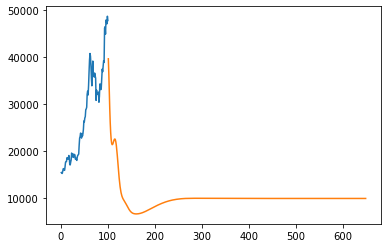

In [42]:
#plt.plot(day_new,scaler.inverse_transform(df1[2205:]))

plt.plot(day_new,scaler.inverse_transform(df1[df2_length:]))

plt.plot(day_pred,scaler.inverse_transform(lst_output))

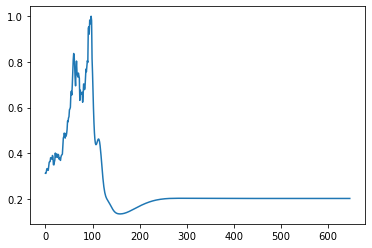

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
#plt.plot(df3[2206:])

df3_length = df2_length + 1

plt.plot(df3[df3_length:])

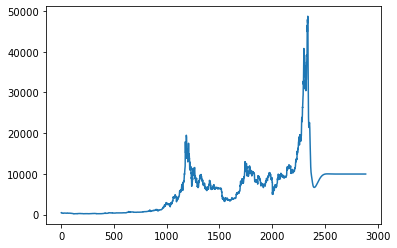

In [44]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)